In [1]:
# Importing the required libraries
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('Hobby_Data.csv')

# EDA

In [3]:
df.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
0,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
1,Yes,Yes,Yes,Mathematics,Yes,3,2,No,No,No,No,No,1,Academics
2,Yes,Yes,Yes,Science,Yes,5,1,Yes,No,No,No,No,1,Academics
3,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
4,Yes,Yes,Yes,Science,Yes,5,3,No,No,No,No,No,2,Academics


In [4]:
df.shape

(1601, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Olympiad_Participation  1601 non-null   object
 1   Scholarship             1601 non-null   object
 2   School                  1601 non-null   object
 3   Fav_sub                 1601 non-null   object
 4   Projects                1601 non-null   object
 5   Grasp_pow               1601 non-null   int64 
 6   Time_sprt               1601 non-null   int64 
 7   Medals                  1601 non-null   object
 8   Career_sprt             1601 non-null   object
 9   Act_sprt                1601 non-null   object
 10  Fant_arts               1601 non-null   object
 11  Won_arts                1601 non-null   object
 12  Time_art                1601 non-null   int64 
 13  Predicted Hobby         1601 non-null   object
dtypes: int64(3), object(11)
memory usage: 175.2+ KB


In [6]:
df.describe()

,Grasp_pow,Time_sprt,Time_art
count,1601.000000,1601.000000,1601.000000
mean,3.480325,3.033729,2.234229
std,1.006737,1.347725,1.266186
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,3.000000,2.000000
75%,4.000000,4.000000,3.000000
max,6.000000,6.000000,6.000000


In [7]:
df.describe(exclude='number')

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Predicted Hobby
count,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
unique,2,2,2,4,2,2,2,2,2,3,3
top,Yes,No,Yes,Mathematics,Yes,Yes,No,Yes,No,No,Academics
freq,822,933,1160,680,926,844,1005,891,908,833,699


In [8]:
df.dtypes

Olympiad_Participation    object
Scholarship               object
School                    object
Fav_sub                   object
Projects                  object
Grasp_pow                  int64
Time_sprt                  int64
Medals                    object
Career_sprt               object
Act_sprt                  object
Fant_arts                 object
Won_arts                  object
Time_art                   int64
Predicted Hobby           object
dtype: object

In [9]:
df.isnull().sum()

Olympiad_Participation    0
Scholarship               0
School                    0
Fav_sub                   0
Projects                  0
Grasp_pow                 0
Time_sprt                 0
Medals                    0
Career_sprt               0
Act_sprt                  0
Fant_arts                 0
Won_arts                  0
Time_art                  0
Predicted Hobby           0
dtype: int64

# Charts
__

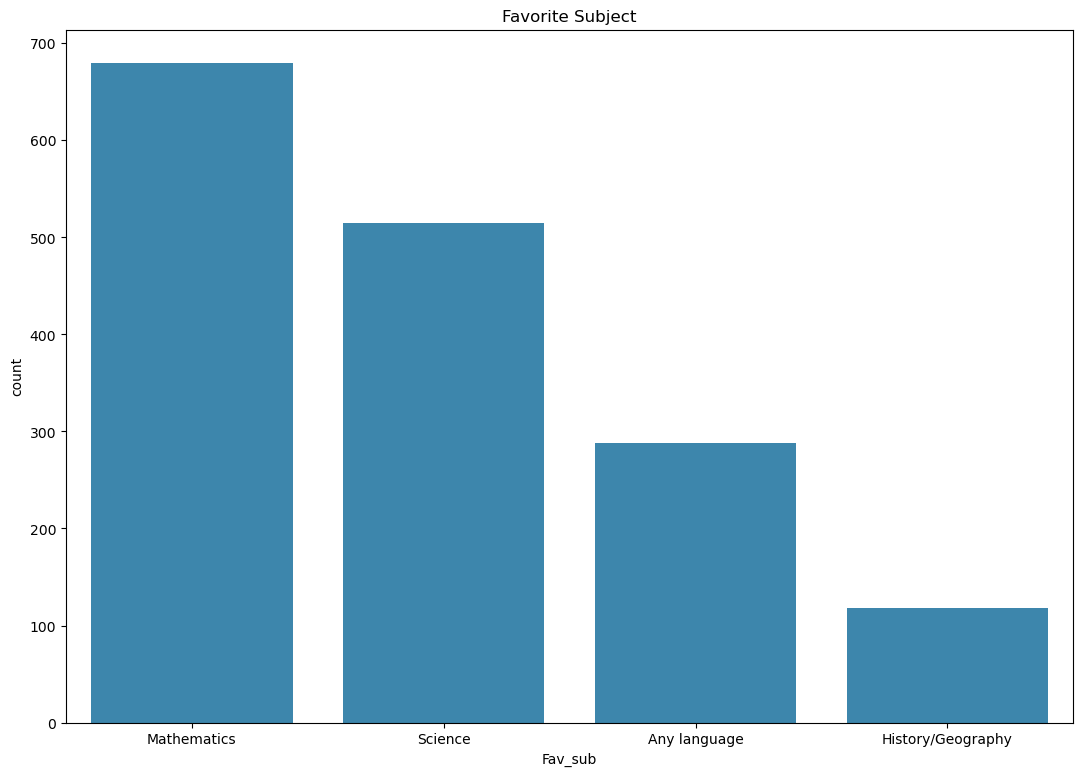

In [10]:
plt.figure(figsize=(13,9))

sns.countplot(data=df, x = 'Fav_sub', color ='#2b8cbe');
plt.title('Favorite Subject');

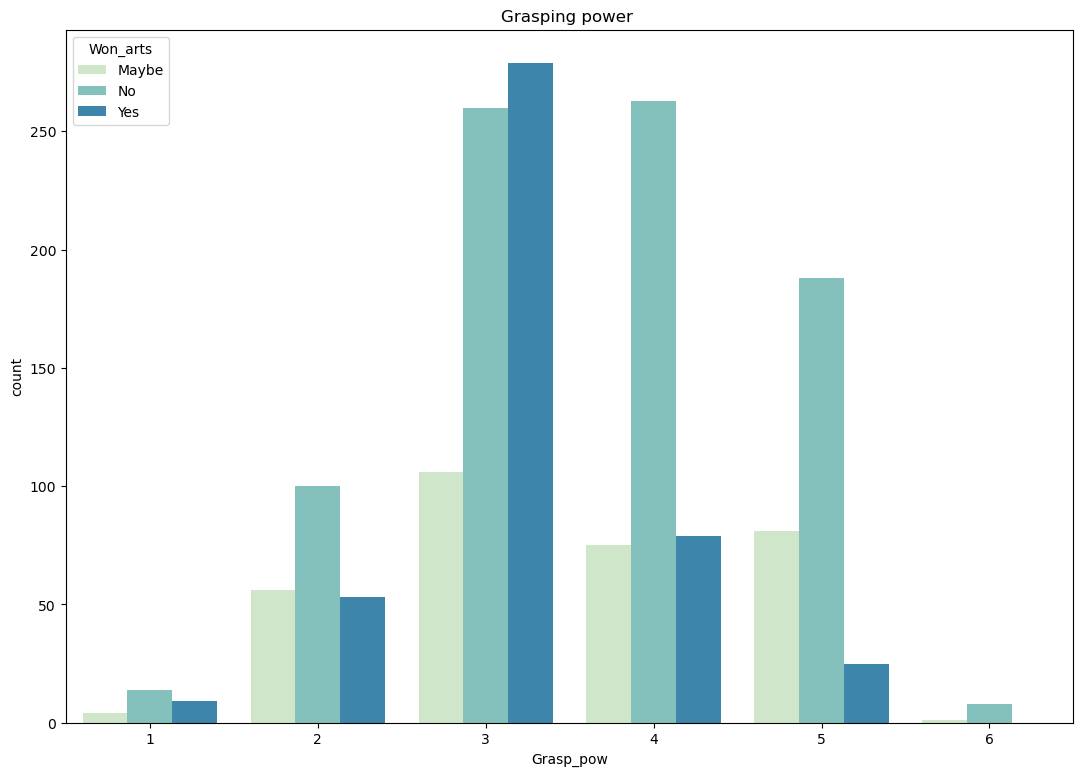

In [11]:
plt.figure(figsize=(13,9))

sns.countplot(data=df, x = 'Grasp_pow',hue='Won_arts', palette='GnBu');
plt.title('Grasping power ');



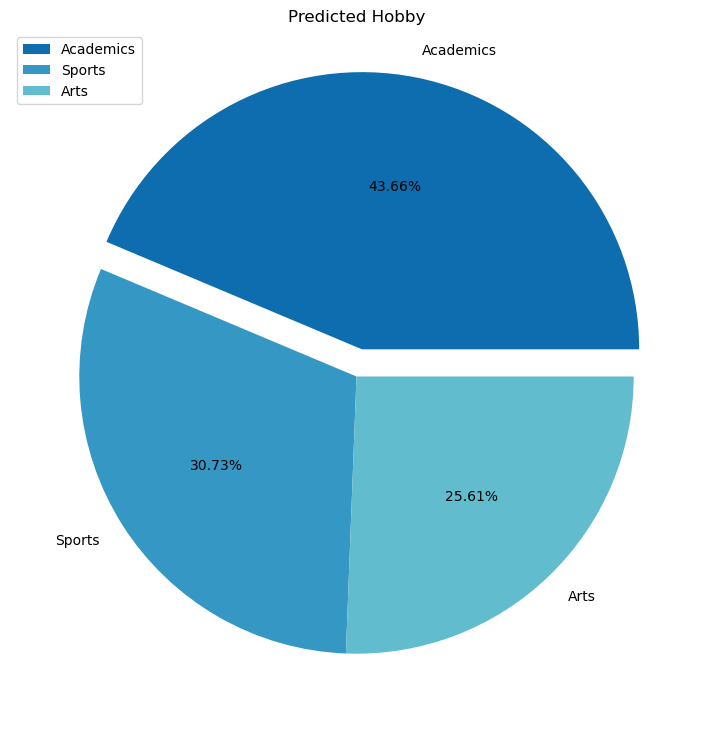

In [12]:
ph = df['Predicted Hobby'].value_counts()
plt.figure(figsize=(13,9))
plt.pie(ph, labels=ph.index, autopct='%1.2f%%',explode = [0.1,0,0],colors = sns.color_palette('GnBu_r'));
plt.legend(loc ='upper left');
plt.title('Predicted Hobby');

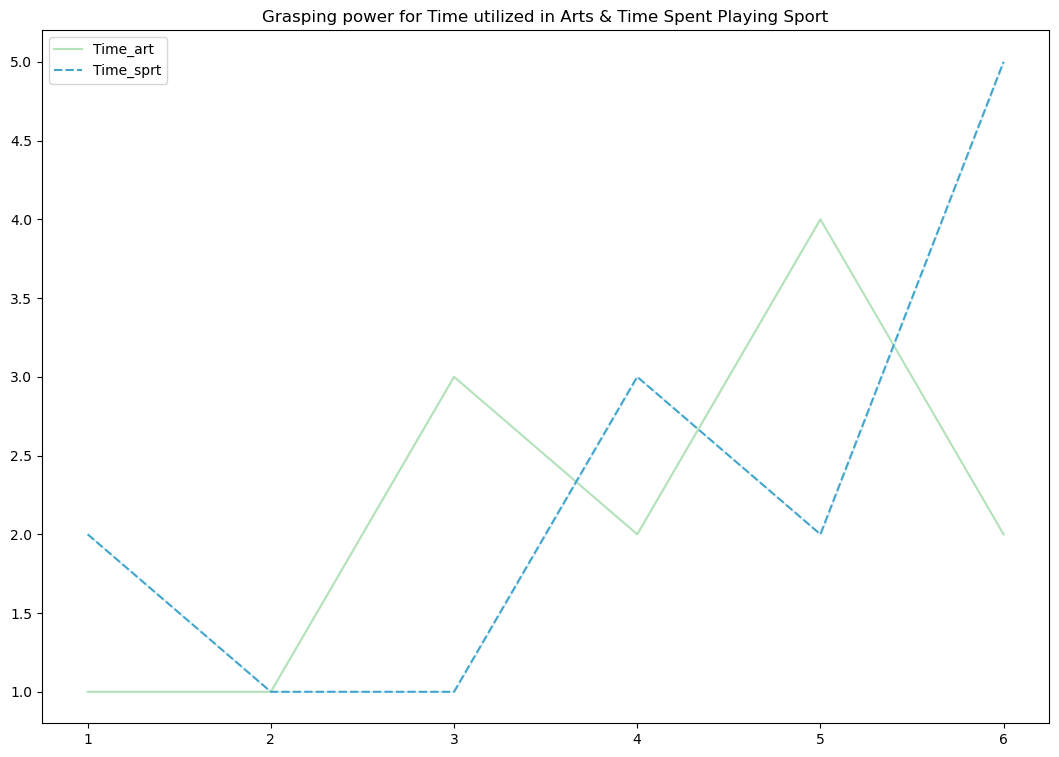

In [13]:
g = df['Grasp_pow']
g = df.loc[g, ['Time_art', 'Time_sprt']]

plt.figure(figsize=(13,9))
sns.lineplot(data=g, palette='GnBu');
plt.title('Grasping power for Time utilized in Arts & Time Spent Playing Sport');

Text(0.5, 1.0, ' Grasping power by Won Sport Medals ')

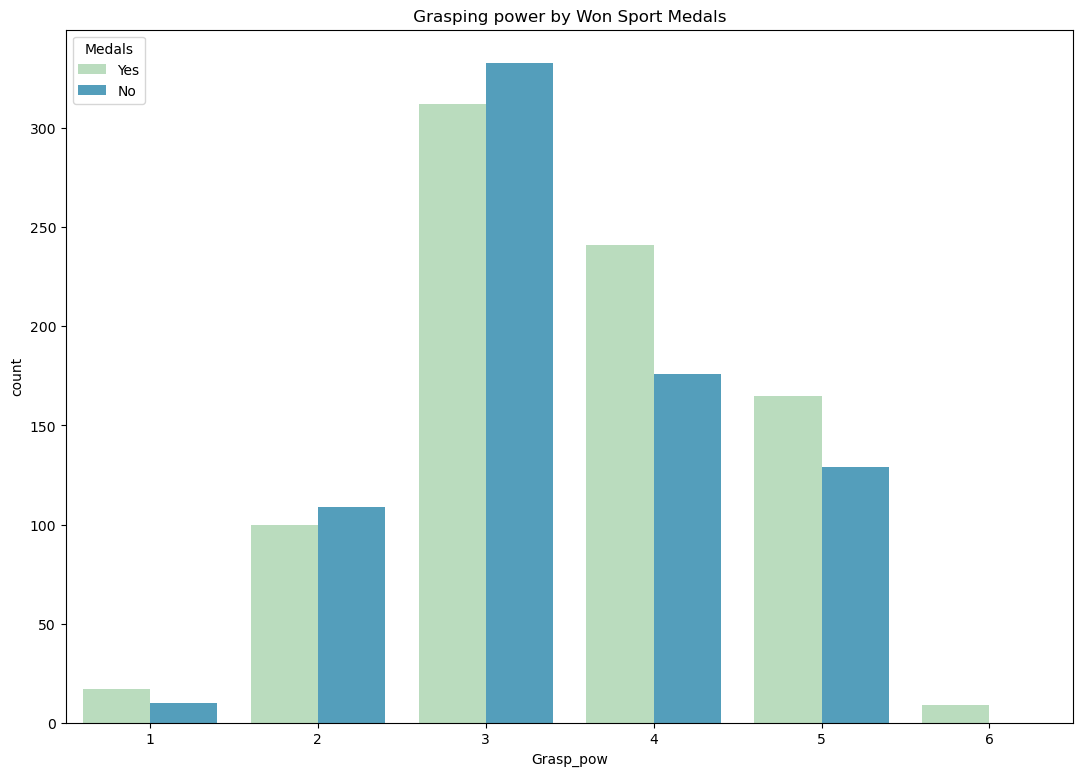

In [14]:
plt.figure(figsize=(13,9))
sns.countplot(data=df, x = 'Grasp_pow',hue='Medals', palette='GnBu');

plt.title(' Grasping power by Won Sport Medals ')


# LabelEncoder

In [15]:
# Show unique values for all object columns
print(df['Projects'].unique())
print(df['Act_sprt'].unique())
print(df['Olympiad_Participation'].unique())
print(df['Scholarship'].unique())
print(df['Career_sprt'].unique())
print(df['School'].unique())
print(df['Fant_arts'].unique())
print(df['Won_arts'].unique())
print(df['Fav_sub'].unique())

['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Maybe' 'No' 'Yes']
['Mathematics' 'Science' 'Any language' 'History/Geography']


In [16]:
label_encoder= preprocessing.LabelEncoder()

# Encode labels that have yes/no values
df['Projects']= label_encoder.fit_transform(df['Projects'])
df['Act_sprt']= label_encoder.fit_transform(df['Act_sprt'])
df['Olympiad_Participation']= label_encoder.fit_transform(df['Olympiad_Participation'])
df['Scholarship']= label_encoder.fit_transform(df['Scholarship'])
df['Medals']= label_encoder.fit_transform(df['Medals'])
df['Career_sprt']= label_encoder.fit_transform(df['Career_sprt'])
df['School']= label_encoder.fit_transform(df['School'])
df['Fant_arts']= label_encoder.fit_transform(df['Fant_arts'])

# Encoding Won_arts column which has different values with new encoder object
le2 = preprocessing.LabelEncoder()
df['Won_arts']= le2.fit_transform(df['Won_arts'])

# Encoding Fav_sub column which has different values with new encoder object
le3 = preprocessing.LabelEncoder()
df['Fav_sub']= le3.fit_transform(df['Fav_sub'])

In [17]:
df.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
0,1,1,1,2,1,5,1,1,0,0,0,0,3,Academics
1,1,1,1,2,1,3,2,0,0,0,0,1,1,Academics
2,1,1,1,3,1,5,1,1,0,0,0,1,1,Academics
3,1,1,1,2,1,5,1,1,0,0,0,0,3,Academics
4,1,1,1,3,1,5,3,0,0,0,0,1,2,Academics


# train-test split methods

In [18]:
X = df.drop(labels='Predicted Hobby', axis=1)
y = df['Predicted Hobby']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size = .30)

# 1- Decision Tree Classifier

In [19]:
model = DecisionTreeClassifier(random_state = 100, max_depth=6, min_samples_leaf=4)

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=100)

In [21]:
predictions = model.predict(X_test)

In [22]:
print(df['Predicted Hobby'].unique())

['Academics' 'Arts' 'Sports']


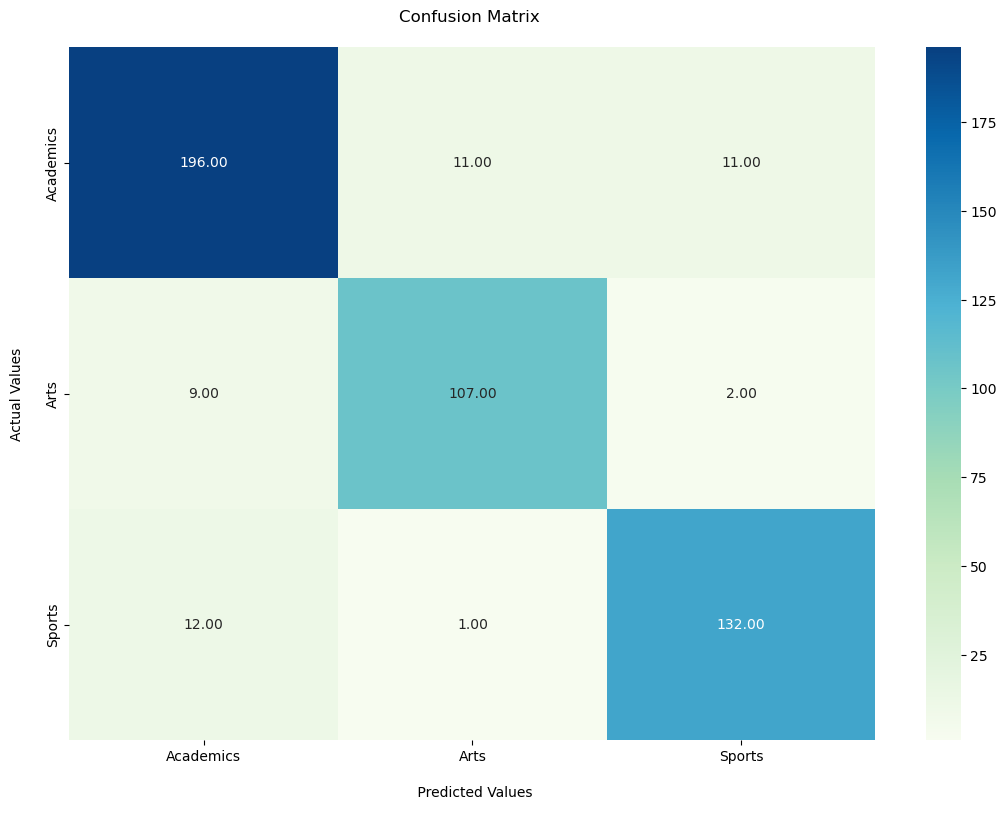

In [23]:
plt.figure(figsize=(13,9))
fx=sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Academics','Arts','Sports'])
fx.yaxis.set_ticklabels(['Academics','Arts','Sports'])
plt.show()

In [24]:
print('Decision Tree')
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

Decision Tree
              precision    recall  f1-score   support

   Academics       0.90      0.90      0.90       218
        Arts       0.90      0.91      0.90       118
      Sports       0.91      0.91      0.91       145

    accuracy                           0.90       481
   macro avg       0.90      0.91      0.90       481
weighted avg       0.90      0.90      0.90       481

[[196  11  11]
 [  9 107   2]
 [ 12   1 132]]
0.9043659043659044


# 2- Gaussian Naive Bayes (GaussianNB).

In [25]:
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = gnb.predict(X_test)

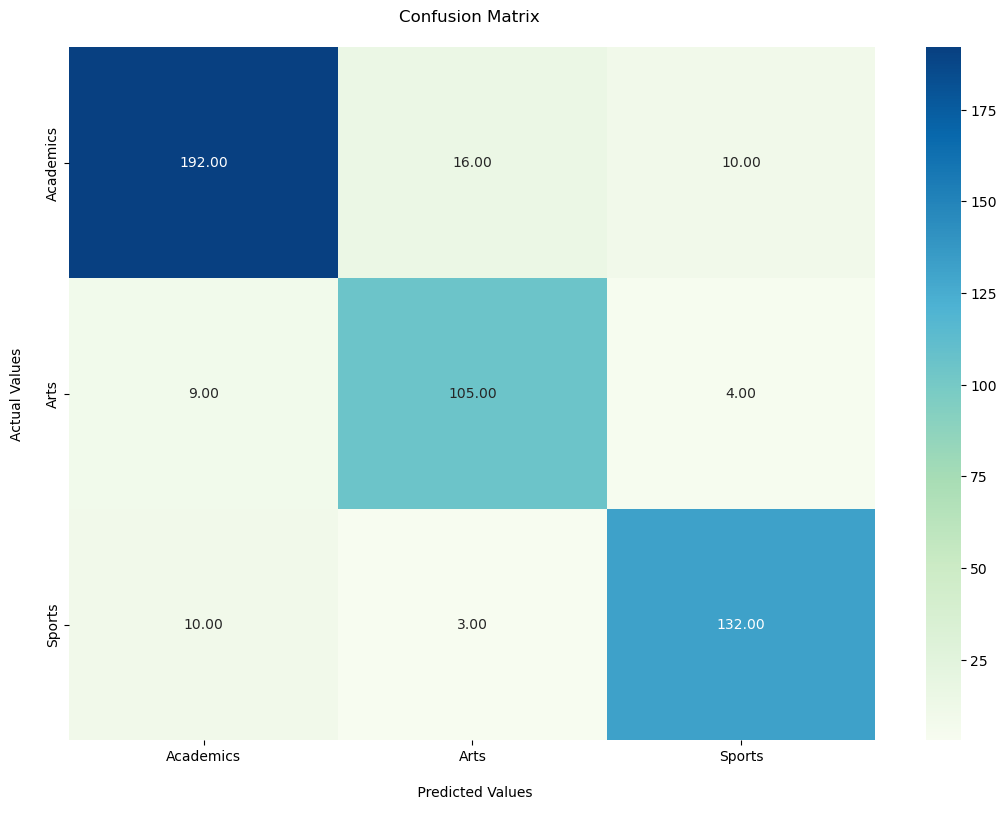

In [27]:
plt.figure(figsize=(13,9))
fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Academics','Arts','Sports'])
fx.yaxis.set_ticklabels(['Academics','Arts','Sports'])
plt.show()

In [28]:
print('Gaussian Naive Bayes')
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

Gaussian Naive Bayes
              precision    recall  f1-score   support

   Academics       0.91      0.88      0.90       218
        Arts       0.85      0.89      0.87       118
      Sports       0.90      0.91      0.91       145

    accuracy                           0.89       481
   macro avg       0.89      0.89      0.89       481
weighted avg       0.89      0.89      0.89       481

[[192  16  10]
 [  9 105   4]
 [ 10   3 132]]
0.8918918918918919


# 3- Random Forest Classifier

In [29]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred=clf.predict(X_test)

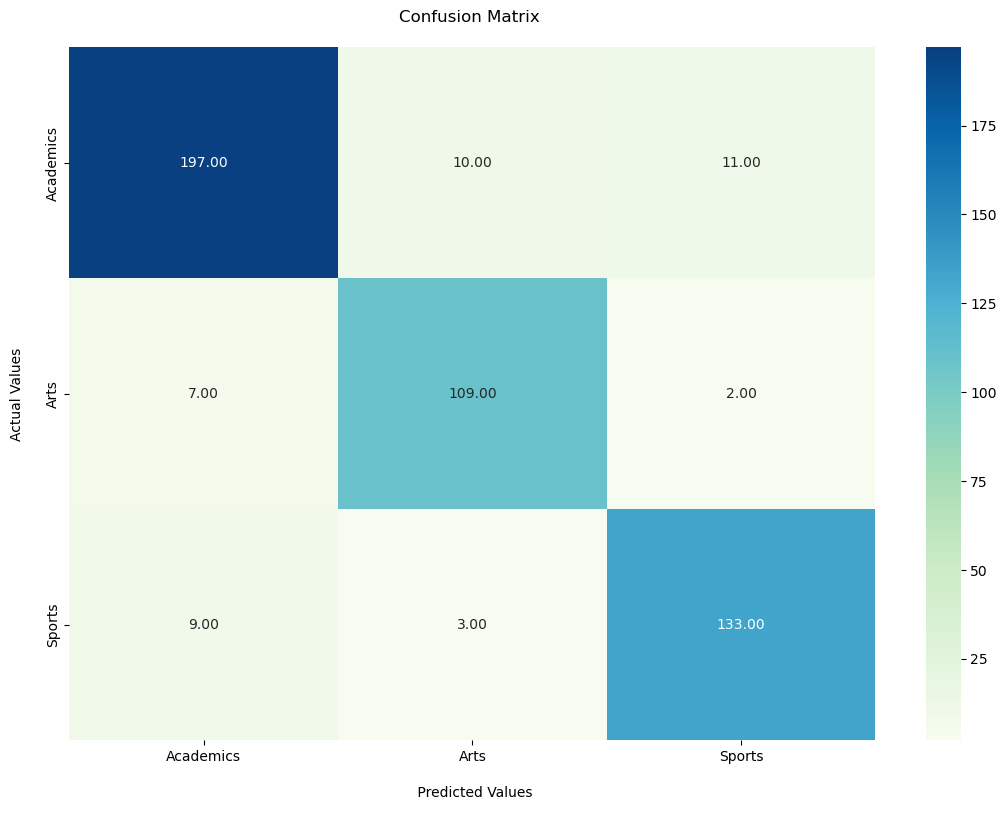

In [31]:
plt.figure(figsize=(13,9))
fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Academics','Arts','Sports'])
fx.yaxis.set_ticklabels(['Academics','Arts','Sports'])
plt.show()

In [32]:
print('Random Forest')
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

Random Forest
              precision    recall  f1-score   support

   Academics       0.92      0.90      0.91       218
        Arts       0.89      0.92      0.91       118
      Sports       0.91      0.92      0.91       145

    accuracy                           0.91       481
   macro avg       0.91      0.91      0.91       481
weighted avg       0.91      0.91      0.91       481

[[197  10  11]
 [  7 109   2]
 [  9   3 133]]
0.9126819126819127


# 3- K Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [34]:
knn = KNeighborsClassifier(n_neighbors = 5, weights='distance', algorithm='brute').fit(X_train, y_train)

In [35]:
knn_pred = knn.predict(X_test)

In [36]:
print('K Nearest Neighbors')
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

K Nearest Neighbors
              precision    recall  f1-score   support

   Academics       0.90      0.89      0.90       218
        Arts       0.90      0.87      0.89       118
      Sports       0.85      0.88      0.87       145

    accuracy                           0.89       481
   macro avg       0.89      0.88      0.88       481
weighted avg       0.89      0.89      0.89       481

[[195   7  16]
 [  9 103   6]
 [ 13   4 128]]
0.8856548856548857


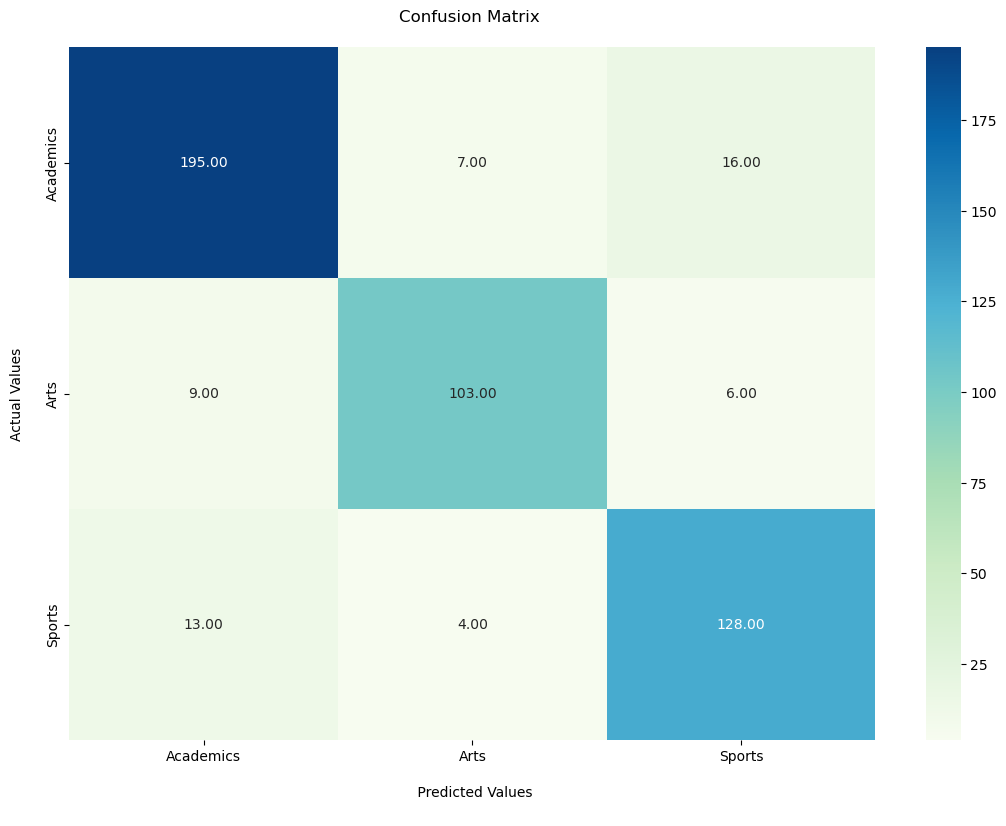

In [37]:
plt.figure(figsize=(13,9))
fx=sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Academics','Arts','Sports'])
fx.yaxis.set_ticklabels(['Academics','Arts','Sports'])
plt.show()

# Kernel SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(kernel = 'rbf', gamma=0.3)
svc.fit(X_train, y_train)

SVC(gamma=0.3)

In [40]:
svc_pred = svc.predict(X_test)

In [41]:
print('Kernel SVM')
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(accuracy_score(y_test,svc_pred))

Kernel SVM
              precision    recall  f1-score   support

   Academics       0.91      0.90      0.90       218
        Arts       0.92      0.92      0.92       118
      Sports       0.88      0.90      0.89       145

    accuracy                           0.90       481
   macro avg       0.90      0.90      0.90       481
weighted avg       0.90      0.90      0.90       481

[[196   8  14]
 [  7 108   3]
 [ 13   2 130]]
0.9022869022869023


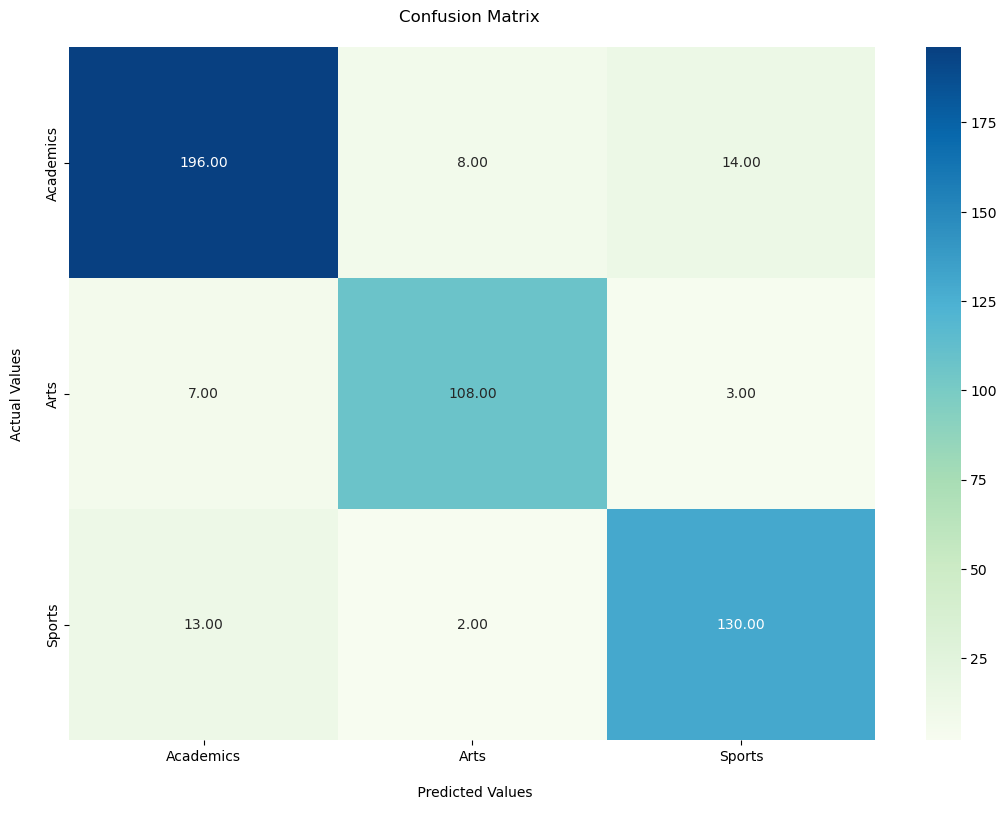

In [42]:
plt.figure(figsize=(13,9))
fx=sns.heatmap(confusion_matrix(y_test,svc_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Academics','Arts','Sports'])
fx.yaxis.set_ticklabels(['Academics','Arts','Sports'])
plt.show()

In [43]:
names=['Decision Tree','Gaussian Naive Bayes','Random Forest','KNeighborsClassifier','Kernel SVM']
Classifiers=[DecisionTreeClassifier(random_state = 100, max_depth=6, min_samples_leaf=4),GaussianNB(),RandomForestClassifier(),KNeighborsClassifier(n_neighbors = 5, weights='distance', algorithm='brute').fit(X_train, y_train), SVC(kernel = 'rbf', gamma=0.3)]

In [44]:
model_col=[]
dff=pd.DataFrame(columns=model_col)
index=0

In [45]:
for name,clf in zip(names,Classifiers):
    clf.fit(X_train,y_train)
    dff.loc[index,'Classifiers']=name
    dff.loc[index,'Test Accuracy']=clf.score(X_test,y_test)
    index+=1

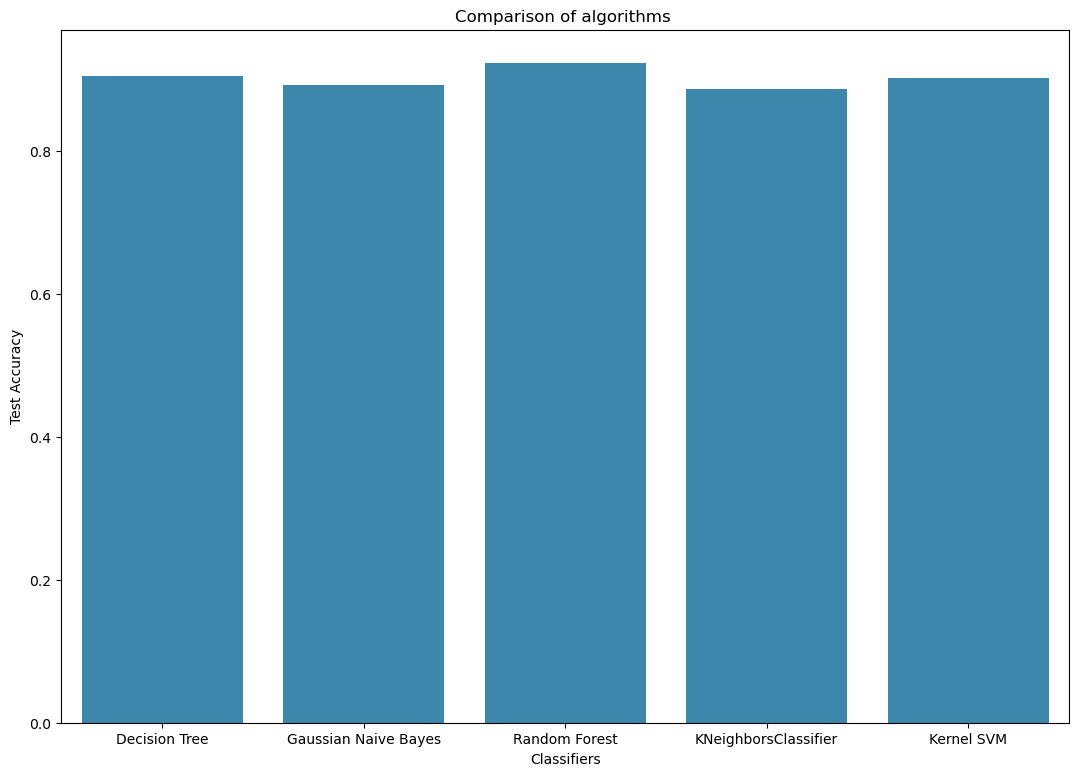

In [46]:
plt.figure(figsize=(13,9))

sns.barplot(y='Test Accuracy',x='Classifiers',data=dff, color='#2b8cbe');
plt.title('Comparison of algorithms ');



In [ ]:
try:
    print("\nHas the child participated in any Science/Math Olympiad? ")
    choice = int(input ("\nSelect answer: 0.No  1.Yes \n"))
        
    print("\nHas the child received any scholarships? ")
    choice2 = int(input ("\nSelect answer: 0.No  1.Yes \n"))
    
    print("\nDoes the child love going to school? ")
    choice3 = int(input ("\nSelect answer: 0.No  1.Yes \n"))
    
    print("\nFavorite subject for the child? ")
    choice4 = int(input ("\nSelect answer: 0.Any language  1.History/Geography 2.Mathematics 3.Science \n"))
    
    print("\nHas the child done any projects under academics? ")
    choice5 = int(input ("\nSelect answer: 0.No  1.Yes \n"))
    
    print("\nThe child’s grasping power from 1 to 6 ")
    choice6 = int(input ("\nEnter answer: \n"))
    
    print("\nHow much time does the child spend time playing outdoors/indoors?")
    choice7 = float(input ("\nEnter answer: \n"))
    
    print("\nHas the child won medals in sports? ")
    choice8 = int(input ("\nSelect answer: 0.No  1.Yes \n"))
    
    print("\nDo the child’s parents want the child to pursue a career in sports? ")
    choice9 = int(input ("\nSelect answer: 0.No  1.Yes \n"))
    
    print("\nDoes the child regularly participate in sporting activities? ")
    choice10 = int(input ("\nSelect answer: 0.No  1.Yes \n"))
    
    print("\nDoes the child love to create fantasy paintings? ")
    choice11 = int(input ("\nSelect answer: 0.No  1.Yes \n"))
    
    print("\nHas the child won art competitions? ")
    choice12 = int(input ("\nSelect answer: 0.Maybe 1.No  2.Yes \n"))
    
    print("\nThe number of hours the child spends in arts ")
    choice13 = int(input ("\nEnter answer: \n"))



except ValueError:
    print("Invalid data type")
        

kid = clf.predict([[choice, choice2, choice3, choice4, choice5, choice6, choice7, choice8, choice9, choice10,
                    choice11, choice12, choice13]])
print('\nThe child\'s hobby is', *kid, sep = ' ' )

# 5- Logistic Regression

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Encode the last column Predicted Hobby with one Hot Encoder
encoder = OneHotEncoder(sparse=False)
df1 = encoder.fit_transform(df[['Predicted Hobby']])

In [ ]:
# Merge df1 with df
lr_df = pd.concat([df,pd.DataFrame(df1)],axis=1)

In [ ]:
# Rename new one hot encoder columns
lr_df.rename(columns={0: "Academics", 1: "Sports", 2: "Arts"},inplace=True,)
lr_df

In [ ]:
X = lr_df.drop(labels=['Predicted Hobby','Academics','Sports','Arts'], axis=1)
y1 = lr_df['Academics'] # y for academics
y2 = lr_df['Sports'] # y for sports
y3 = lr_df['Arts'] # y for Arts


In [ ]:
# Split the data for predicting Acadamics hoppy (y1)
X_train, X_test, y_train, y1_test = train_test_split(X, y1, random_state=100, test_size = .30)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y1_predict = lr.predict(X_test)

In [ ]:
print('Logistic Regression For Academics Hoppy')
print(classification_report(y1_test,y1_predict))
print(confusion_matrix(y1_test,y1_predict))
print(accuracy_score(y1_test,y1_predict))
academics = classification_report(y1_test,y1_predict)

In [ ]:
# Split the data for predicting sport hoppy (y2)
X_train, X_test, y_train, y2_test = train_test_split(X, y2, random_state=100, test_size = .30)

# Create and train the model
lrs = LogisticRegression()
lrs.fit(X_train,y_train)
y2_predict = lrs.predict(X_test)

In [ ]:
print('Logistic Regression For Sports Hoppy')
print(classification_report(y2_test,y2_predict))
print(confusion_matrix(y2_test,y2_predict))
print(accuracy_score(y2_test,y2_predict))
sports = classification_report(y2_test,y2_predict)

In [ ]:
# Split the data for predicting arts hoppy (y3)
X_train, X_test, y_train, y3_test = train_test_split(X, y3, random_state=100, test_size = .30)

# Create and train the model
lra = LogisticRegression()
lra.fit(X_train,y_train)
y3_predict = lra.predict(X_test)

In [ ]:
print('Logistic Regression For arts Hoppy')
print(classification_report(y3_test,y3_predict))
print(confusion_matrix(y3_test,y3_predict))
print(accuracy_score(y3_test,y3_predict))
arts = classification_report(y3_test,y3_predict)

In [ ]:
plt.figure(figsize=(13,9))
fx=sns.heatmap(confusion_matrix(y3_test,y3_predict), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Arts','Not Arts'])
fx.yaxis.set_ticklabels(['Arts','Not Arts'])
plt.show()

In [ ]:
plt.figure(figsize=(13,9))
fx=sns.heatmap(confusion_matrix(y1_test,y1_predict), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Acadamics','Not Acadamics'])
fx.yaxis.set_ticklabels(['Acadamics','Not Acadamics'])
plt.show()

In [ ]:
plt.figure(figsize=(13,9))
fx=sns.heatmap(confusion_matrix(y2_test,y2_predict), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Sports','Not Sports'])
fx.yaxis.set_ticklabels(['Sports','Not Sports'])
plt.show()